# PCA Analysis

### Load imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

source_dir = '../'
sys.path.append(source_dir)

from functions.filter_and_clean_dataframe import filter_and_clean_dataframe
from functions.get_pca_coordinates import get_pca_coordinates
from functions.get_lda_coordinates import get_lda_coordinates
from functions.plot_pca_lda import plot_pca_lda


# Set figure styles
sns.set_style("whitegrid")

# Set default color for text and lines to black
sns.set(rc={"axes.facecolor": "white", "axes.edgecolor": "black", "grid.color": "black", 
            "text.color": "black", "xtick.color": "black", "ytick.color": "black", 
            "axes.labelcolor": "black", "figure.facecolor": "white", "font.size": 20, 
            "axes.titlesize": 14, "axes.labelsize": 10, "xtick.labelsize": 14, "ytick.labelsize": 14, 
            "legend.fontsize": 14})


### Load data

In [2]:
intracellular_df = pd.read_csv('../processed_data/intra_gcms.csv', index_col=0)
extracellular_1_df = pd.read_csv('../processed_data/extra_gcms_1.csv', index_col=0)
extracellular_4_df = pd.read_csv('../processed_data/extra_gcms_4.csv', index_col=0)
intracellular_pos_df = pd.read_csv('../processed_data/intra_lcms_pos.csv', index_col=0)
intracellular_neg_df = pd.read_csv('../processed_data/intra_lcms_neg.csv', index_col=0)
extracellular_pos_df = pd.read_csv('../processed_data/extra_lcms_pos.csv', index_col=0)
extracellular_neg_df = pd.read_csv('../processed_data/extra_lcms_neg.csv', index_col=0)

print(f'intracellular_df has shape {intracellular_df.shape}')
print(f'extracellular_1_df has shape {extracellular_1_df.shape}')
print(f'extracellular_4_df has shape {extracellular_4_df.shape}')
print(f'intracellular_pos_df has shape {intracellular_pos_df.shape}')
print(f'intracellular_neg_df has shape {intracellular_neg_df.shape}')
print(f'extracellular_pos_df has shape {extracellular_pos_df.shape}')
print(f'extracellular_neg_df has shape {extracellular_neg_df.shape}')

intracellular_df.head()

intracellular_df has shape (25, 320)
extracellular_1_df has shape (26, 247)
extracellular_4_df has shape (53, 279)
intracellular_pos_df has shape (27, 721)
intracellular_neg_df has shape (27, 665)
extracellular_pos_df has shape (80, 520)
extracellular_neg_df has shape (80, 661)


,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Adipic acid,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,...,Unknown 220,Unknown 221,Unknown 222,Unknown 223,Unknown 224,Unknown 225,Unknown 226,Unknown 227,Unknown 228,Unknown 229
Tags,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_switchgrass_pvhg6_early_stat_1,206675.073240236,265628.2073572,398155.546965357,461693.997122307,553917.012625364,0.0,39884.14605205,1751763.14357969,1766960.21177728,98325.766858502,...,4.299281e+05,49456.507927,371788.053410,234280.995486,5832.703213,1.645217e+06,351925.677818,24385.393103,217630.729539,198363.596018
in_switchgrass_pvhg6_early_stat_3,341996.103780714,358143.914807286,448290.918266103,496714.999168787,638854.84035566,0.0,84423.2394990384,2040960.80587233,2032543.136365,115405.400973157,...,5.233400e+05,54438.918937,417617.364083,370183.713935,30622.454946,2.054061e+06,492993.409911,61659.348813,214347.074793,200325.541072
in_switchgrass_pvhg6_early_stat_2,263361.804510689,316901.937516122,382225.895834572,549619.810167144,802743.275250288,0.0,65523.7689777048,2144767.05673166,2175518.31265378,157969.941265746,...,5.223632e+05,78126.743977,411800.779492,501043.347306,528.570981,2.814759e+06,305358.590677,0.000000,267134.158139,243310.544402
in_switchgrass_wt_early_stat_1,361520.397329639,158448.34341112,322605.073303065,677195.048082466,710902.55546792,0.0,21587.08362939,1742924.76926073,2187317.70629786,73643.828000748,...,1.094674e+06,68781.500733,389899.251774,53068.346347,41841.431914,4.591185e+05,0.000000,0.000000,0.000000,0.000000


### Define a list of labels related to early stationary phase wildtype

In [3]:
intracellular_labels = list(intracellular_df.index)

# remove 'Tags' row
labels_to_keep = [label for label in intracellular_labels if label != 'Tags']

# remove the PVHG strain rows to keep only the wild type data
labels_to_keep = [label for label in labels_to_keep if 'pvhg6' not in label]

# make a list of corresponding labels for the extracellular data
extra_labels_to_keep = [label.replace('in_', 'ex_') for label in labels_to_keep]

display(labels_to_keep)

extra_labels_to_keep

['in_switchgrass_wt_early_stat_1',
 'in_switchgrass_wt_early_stat_2',
 'in_switchgrass_wt_early_stat_3',
 'in_pvhg_wt_early_stat_1a',
 'in_pvhg_wt_early_stat_2a',
 'in_pvhg_wt_early_stat_3a',
 'in_glc_wt_early_stat_1',
 'in_glc_wt_early_stat_2',
 'in_glc_wt_early_stat_3',
 'in_glc/phe_wt_early_stat_1',
 'in_glc/phe_wt_early_stat_2',
 'in_glc/phe_wt_early_stat_3',
 'in_phe_wt_early_stat_1',
 'in_phe_wt_early_stat_2',
 'in_phe_wt_early_stat_3',
 'in_pvhg_wt_early_stat_1b',
 'in_pvhg_wt_early_stat_2b',
 'in_pvhg_wt_early_stat_3b']

['ex_switchgrass_wt_early_stat_1',
 'ex_switchgrass_wt_early_stat_2',
 'ex_switchgrass_wt_early_stat_3',
 'ex_pvhg_wt_early_stat_1a',
 'ex_pvhg_wt_early_stat_2a',
 'ex_pvhg_wt_early_stat_3a',
 'ex_glc_wt_early_stat_1',
 'ex_glc_wt_early_stat_2',
 'ex_glc_wt_early_stat_3',
 'ex_glc/phe_wt_early_stat_1',
 'ex_glc/phe_wt_early_stat_2',
 'ex_glc/phe_wt_early_stat_3',
 'ex_phe_wt_early_stat_1',
 'ex_phe_wt_early_stat_2',
 'ex_phe_wt_early_stat_3',
 'ex_pvhg_wt_early_stat_1b',
 'ex_pvhg_wt_early_stat_2b',
 'ex_pvhg_wt_early_stat_3b']

### Remove the rows that are not related to early stationary phase wildtype

In [4]:
intracellular_df = filter_and_clean_dataframe(intracellular_df, labels_to_keep)
extracellular_1_df = filter_and_clean_dataframe(extracellular_1_df, extra_labels_to_keep)
extracellular_4_df = filter_and_clean_dataframe(extracellular_4_df, extra_labels_to_keep)
intracellular_pos_df = filter_and_clean_dataframe(intracellular_pos_df, labels_to_keep)
intracellular_neg_df = filter_and_clean_dataframe(intracellular_neg_df, labels_to_keep)
extracellular_pos_df = filter_and_clean_dataframe(extracellular_pos_df, extra_labels_to_keep)
extracellular_neg_df = filter_and_clean_dataframe(extracellular_neg_df, extra_labels_to_keep)

print(f'intracellular_df has shape {intracellular_df.shape}')
print(f'extracellular_1_df has shape {extracellular_1_df.shape}')
print(f'extracellular_4_df has shape {extracellular_4_df.shape}')
print(f'intracellular_pos_df has shape {intracellular_pos_df.shape}')
print(f'intracellular_neg_df has shape {intracellular_neg_df.shape}')
print(f'extracellular_pos_df has shape {extracellular_pos_df.shape}')
print(f'extracellular_neg_df has shape {extracellular_neg_df.shape}')

intracellular_df.head()

intracellular_df has shape (18, 286)
extracellular_1_df has shape (3, 193)
extracellular_4_df has shape (12, 157)
intracellular_pos_df has shape (18, 721)
intracellular_neg_df has shape (18, 184)
extracellular_pos_df has shape (15, 520)
extracellular_neg_df has shape (15, 661)


,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,Dehydroalanine,...,Unknown 218,Unknown 219,Unknown 220,Unknown 221,Unknown 222,Unknown 223,Unknown 224,Unknown 225,Unknown 227,Unknown 228
in_switchgrass_wt_early_stat_1,361520.397329639,158448.34341112,322605.073303065,677195.048082466,710902.55546792,21587.08362939,1742924.76926073,2187317.70629786,73643.828000748,317216.41938428,...,130212.850373,177862.065221,1.094674e+06,68781.500733,389899.251774,53068.346347,41841.431914,4.591185e+05,0.000000,0.000000
in_switchgrass_wt_early_stat_2,227309.55760657,213583.36610502,312837.42938902,575822.106374466,510742.474927335,30589.6316662972,1362157.06455961,2078919.83564604,85094.117589131,336929.76297088,...,100599.760305,38851.616960,1.009201e+06,1436.631471,329173.115631,25717.116848,68910.728565,3.197350e+05,0.000000,56779.311934
in_switchgrass_wt_early_stat_3,398074.885557321,211939.49668843,296180.63097077,819996.231224398,618736.890582027,43765.31575552,1604466.57278453,2008970.44657791,110175.160063256,515591.82996428,...,170490.319030,110556.183062,1.093756e+06,31836.436103,298349.927472,16888.000000,84416.704355,3.545822e+05,0.000000,89284.602693
in_pvhg_wt_early_stat_1a,15162280.8838296,415540.715236955,271752.376247778,72902.08496758,594252.444514168,30943.57955535,2485640.0470855,1821222.8634703,228090.297121264,220103.450019034,...,248261.955541,45495.945335,5.179437e+05,0.000000,366176.184526,252223.286216,53518.540311,1.859585e+06,88410.560299,84165.419686
in_pvhg_wt_early_stat_2a,18852341.7192045,414698.828302764,282297.43522253,2048534.51426727,631378.749461895,34596.4930274828,3083610.04949007,2065605.09371182,267275.475767908,440350.185467694,...,150835.869799,72655.556268,5.797238e+05,34784.508770,569940.545190,297030.991759,55202.910424,2.384776e+06,0.000000,70356.393692


### Get PCA and LDA data

In [5]:
intracellular_gc_ms_pca, intracellular_gc_ms_pca_ls = get_pca_coordinates(intracellular_df)
extracellular_gc_ms_pca, extracellular_gc_ms_pca_ls = get_pca_coordinates(extracellular_4_df)
intracellular_lc_ms_pos_pca, intracellular_lc_ms_pos_pca_ls = get_pca_coordinates(intracellular_pos_df)
extracellular_lc_ms_pos_pca, extracellular_lc_ms_pos_pca_ls = get_pca_coordinates(extracellular_pos_df)

intracellular_gc_ms_lda, intracellular_gc_ms_lda_ls = get_lda_coordinates(intracellular_df)
extracellular_gc_ms_lda, extracellular_gc_ms_lda_ls = get_lda_coordinates(extracellular_4_df)
intracellular_lc_ms_pos_lda, intracellular_lc_ms_pos_lda_ls = get_lda_coordinates(intracellular_pos_df)
extracellular_lc_ms_pos_lda, extracellular_lc_ms_pos_lda_ls = get_lda_coordinates(extracellular_pos_df)

display(intracellular_gc_ms_pca)
intracellular_gc_ms_pca_ls

,Principal Component 1,Principal Component 2,Group
in_switchgrass_wt_early_stat_1,1.057445e+08,2.168830e+06,switchgrass
in_switchgrass_wt_early_stat_2,-3.018595e+07,-7.787109e+07,switchgrass
in_switchgrass_wt_early_stat_3,8.916604e+07,-9.273947e+06,switchgrass
in_pvhg_wt_early_stat_1a,1.015579e+08,-2.020429e+07,pvhg
in_pvhg_wt_early_stat_2a,1.156199e+08,2.416396e+06,pvhg
in_pvhg_wt_early_stat_3a,1.138829e+08,-7.043350e+06,pvhg
in_glc_wt_early_stat_1,-1.474468e+08,9.056220e+06,glc
in_glc_wt_early_stat_2,-1.233330e+08,-3.983089e+07,glc
in_glc_wt_early_stat_3,-1.307603e+08,-2.272777e+07,glc
in_glc/phe_wt_early_stat_1,-1.083628e+08,2.393265e+07,glc/phe


,Principal Component 1,Principal Component 2,abs_distance
Trehalose,0.858486,0.445598,0.967242
Unknown 188,-0.413301,0.727942,0.837088
Phosphate Ion,-0.189113,0.481642,0.517439
L-aspartic acid,0.069601,0.122398,0.140803
L-pyroglutamic acid,-0.130638,-0.018517,0.131944
...,...,...,...
Unknown 012,0.000007,0.000053,0.000053
Unknown 134,0.000027,-0.000021,0.000034
Phytanic acid,-0.000024,0.000024,0.000034
Unknown 077,-0.000002,0.000026,0.000026


### Make PCA plots

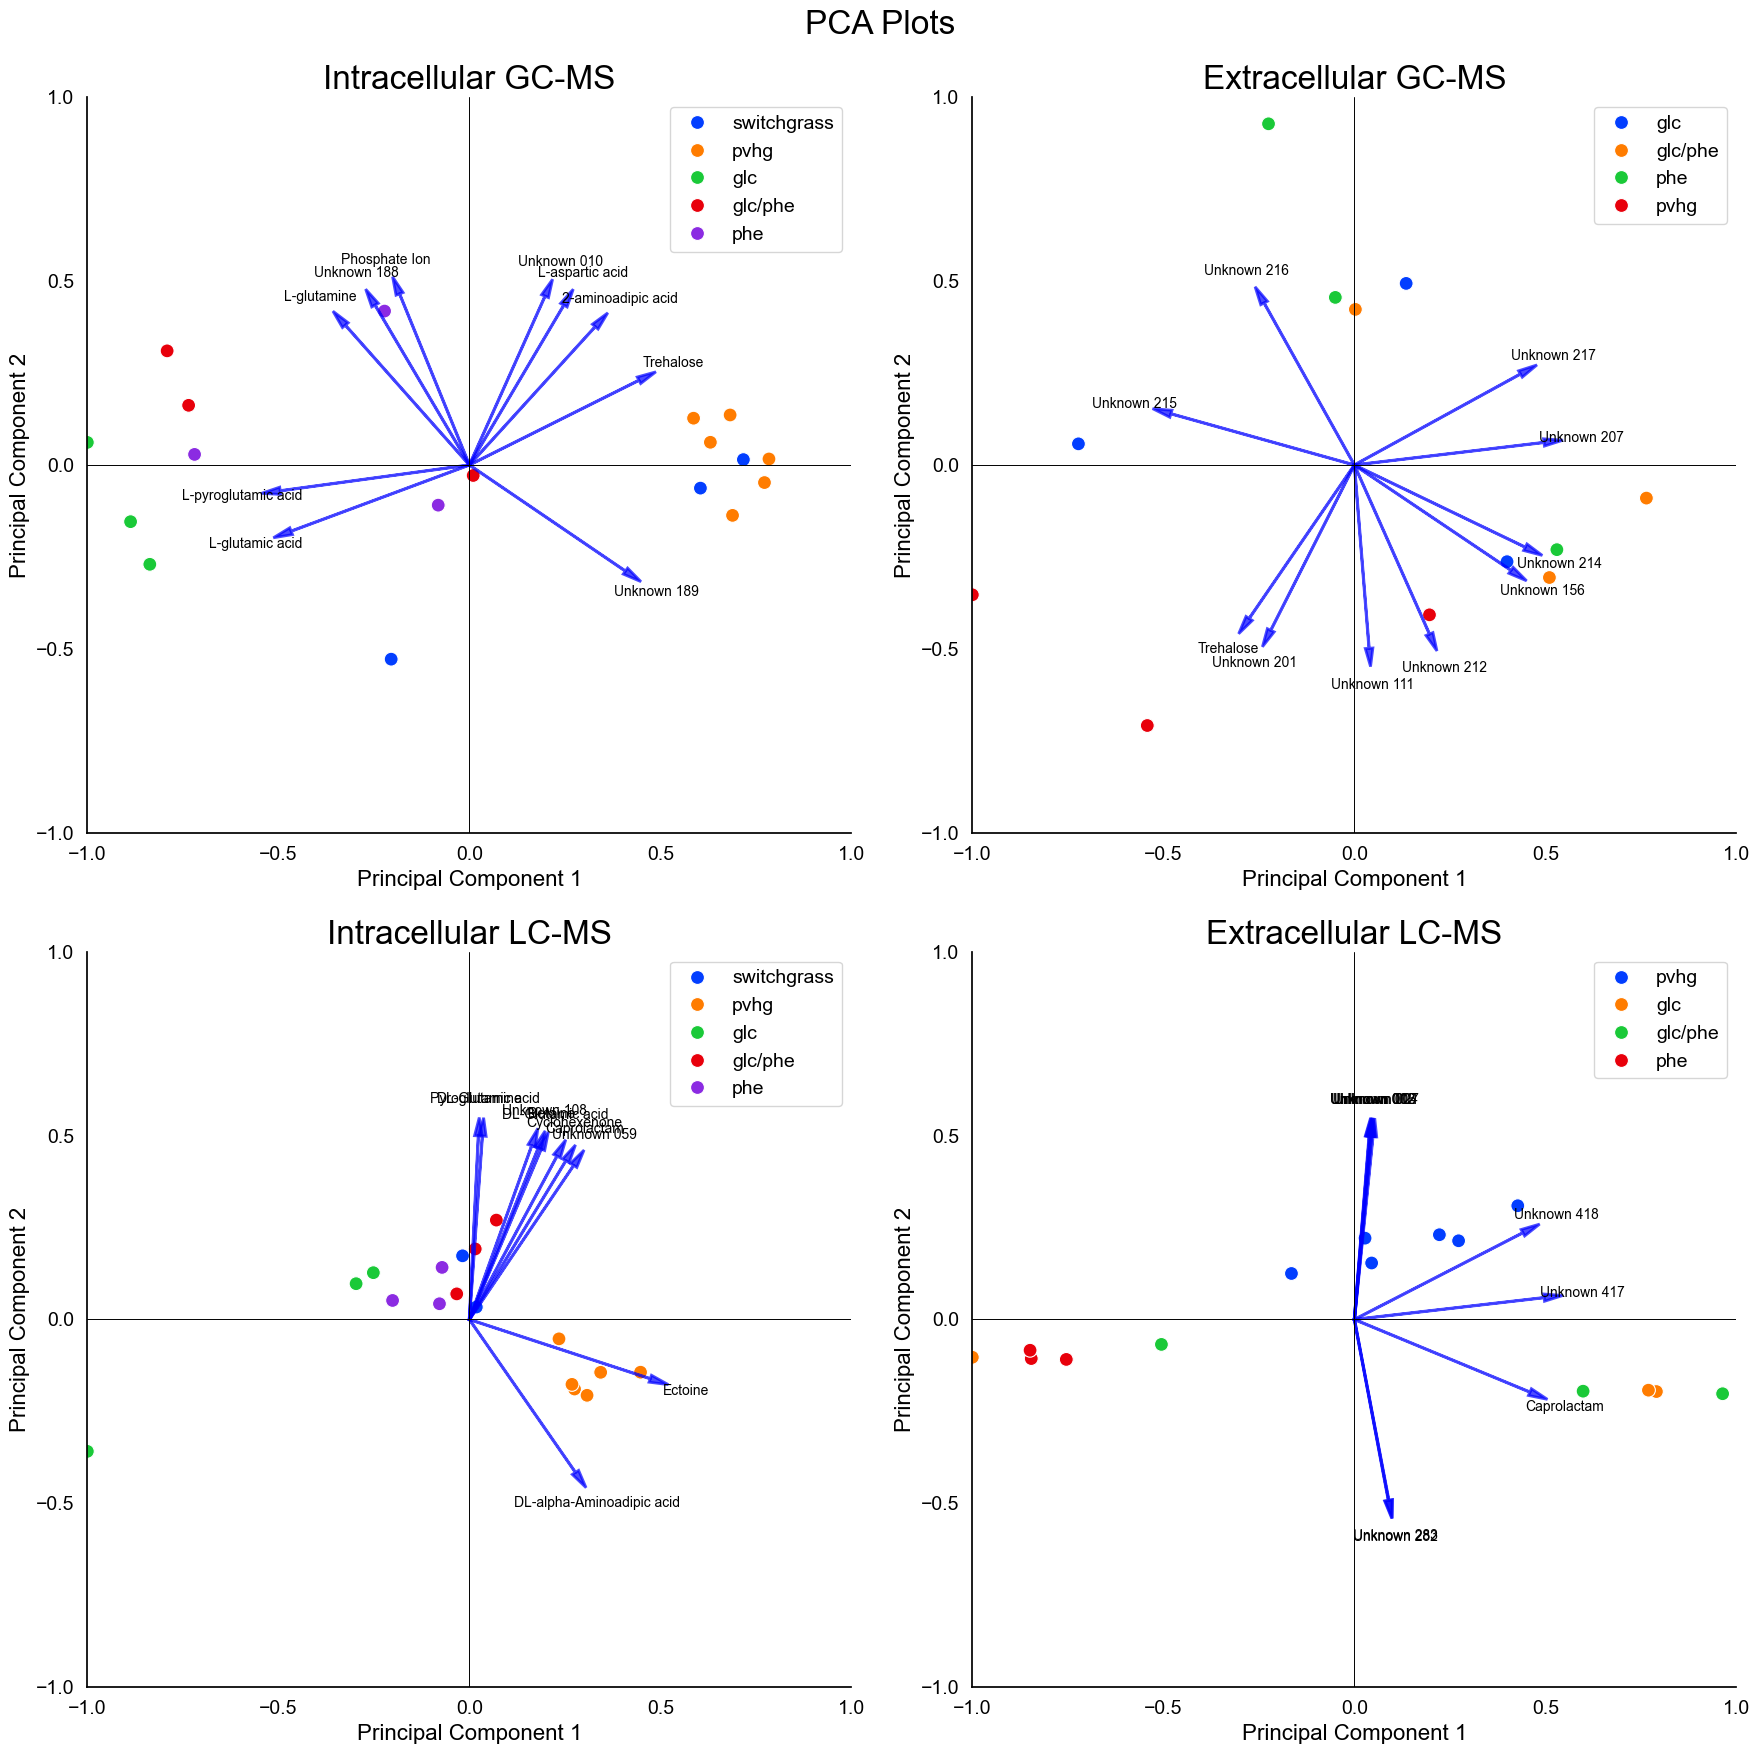

,Principal Component 1,Principal Component 2,abs_distance
Trehalose,0.858486,0.445598,0.967242
Unknown 188,-0.413301,0.727942,0.837088
Phosphate Ion,-0.189113,0.481642,0.517439
L-aspartic acid,0.069601,0.122398,0.140803
L-pyroglutamic acid,-0.130638,-0.018517,0.131944
Unknown 189,0.107427,-0.075898,0.131533
L-glutamic acid,-0.094944,-0.036627,0.101764
2-aminoadipic acid,0.053856,0.061522,0.081765
Unknown 010,0.022339,0.051812,0.056422
L-glutamine,-0.034592,0.040517,0.053275


,Principal Component 1,Principal Component 2,abs_distance
Unknown 216,-0.468072,0.872918,0.990493
Unknown 217,0.848054,0.482926,0.975917
Unknown 207,0.218831,0.027034,0.220495
Unknown 156,0.077083,-0.053868,0.094041
Unknown 215,-0.075775,0.021985,0.078900
Unknown 214,0.046040,-0.023020,0.051474
Unknown 111,0.000757,-0.009808,0.009837
Unknown 201,-0.002105,-0.004324,0.004809
Unknown 212,0.001022,-0.002392,0.002601
Trehalose,-0.001292,-0.001959,0.002346


,Principal Component 1,Principal Component 2,abs_distance
Ectoine,0.886307,-0.301519,0.936191
DL-Glutamic acid,0.254353,0.627488,0.677079
Unknown 108,0.179801,0.521150,0.551294
Cyclohexenone,0.096799,0.187573,0.211077
Caprolactam,0.099642,0.170373,0.197371
DL-Glutamine,0.009030,0.192277,0.192489
Betaine,0.054035,0.139861,0.149937
Pyroglutamic acid,0.009410,0.138521,0.138840
Unknown 059,0.069364,0.106512,0.127107
DL-alpha-Aminoadipic acid,0.069804,-0.104577,0.125734


,Principal Component 1,Principal Component 2,abs_distance
Ectoine,0.886307,-0.301519,0.936191
DL-Glutamic acid,0.254353,0.627488,0.677079
Unknown 108,0.179801,0.521150,0.551294
Cyclohexenone,0.096799,0.187573,0.211077
Caprolactam,0.099642,0.170373,0.197371
DL-Glutamine,0.009030,0.192277,0.192489
Betaine,0.054035,0.139861,0.149937
Pyroglutamic acid,0.009410,0.138521,0.138840
Unknown 059,0.069364,0.106512,0.127107
DL-alpha-Aminoadipic acid,0.069804,-0.104577,0.125734


In [6]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18))


# Plot each PCA plot in a separate subplot
plot_pca_lda(axs[0, 0], intracellular_gc_ms_pca, intracellular_gc_ms_pca_ls,'Intracellular GC-MS')
plot_pca_lda(axs[0, 1], extracellular_gc_ms_pca, extracellular_gc_ms_pca_ls,'Extracellular GC-MS')
plot_pca_lda(axs[1, 0], intracellular_lc_ms_pos_pca, intracellular_lc_ms_pos_pca_ls,'Intracellular LC-MS')
plot_pca_lda(axs[1, 1], extracellular_lc_ms_pos_pca, extracellular_lc_ms_pos_pca_ls, 'Extracellular LC-MS')

# Add an overall title for the entire figure
fig.suptitle('PCA Plots', fontsize=24)

# Automatically adjust the layout to minimize white space
plt.tight_layout()

# save to file
plt.savefig('../figures/pca_plot_with_unknowns.png', dpi=300)

# Display the plots
plt.show()

display(intracellular_gc_ms_pca_ls.head(10))
display(extracellular_gc_ms_pca_ls.head(10))
display(intracellular_lc_ms_pos_pca_ls.head(10))
display(intracellular_lc_ms_pos_pca_ls.head(10))

### Make LDA plots

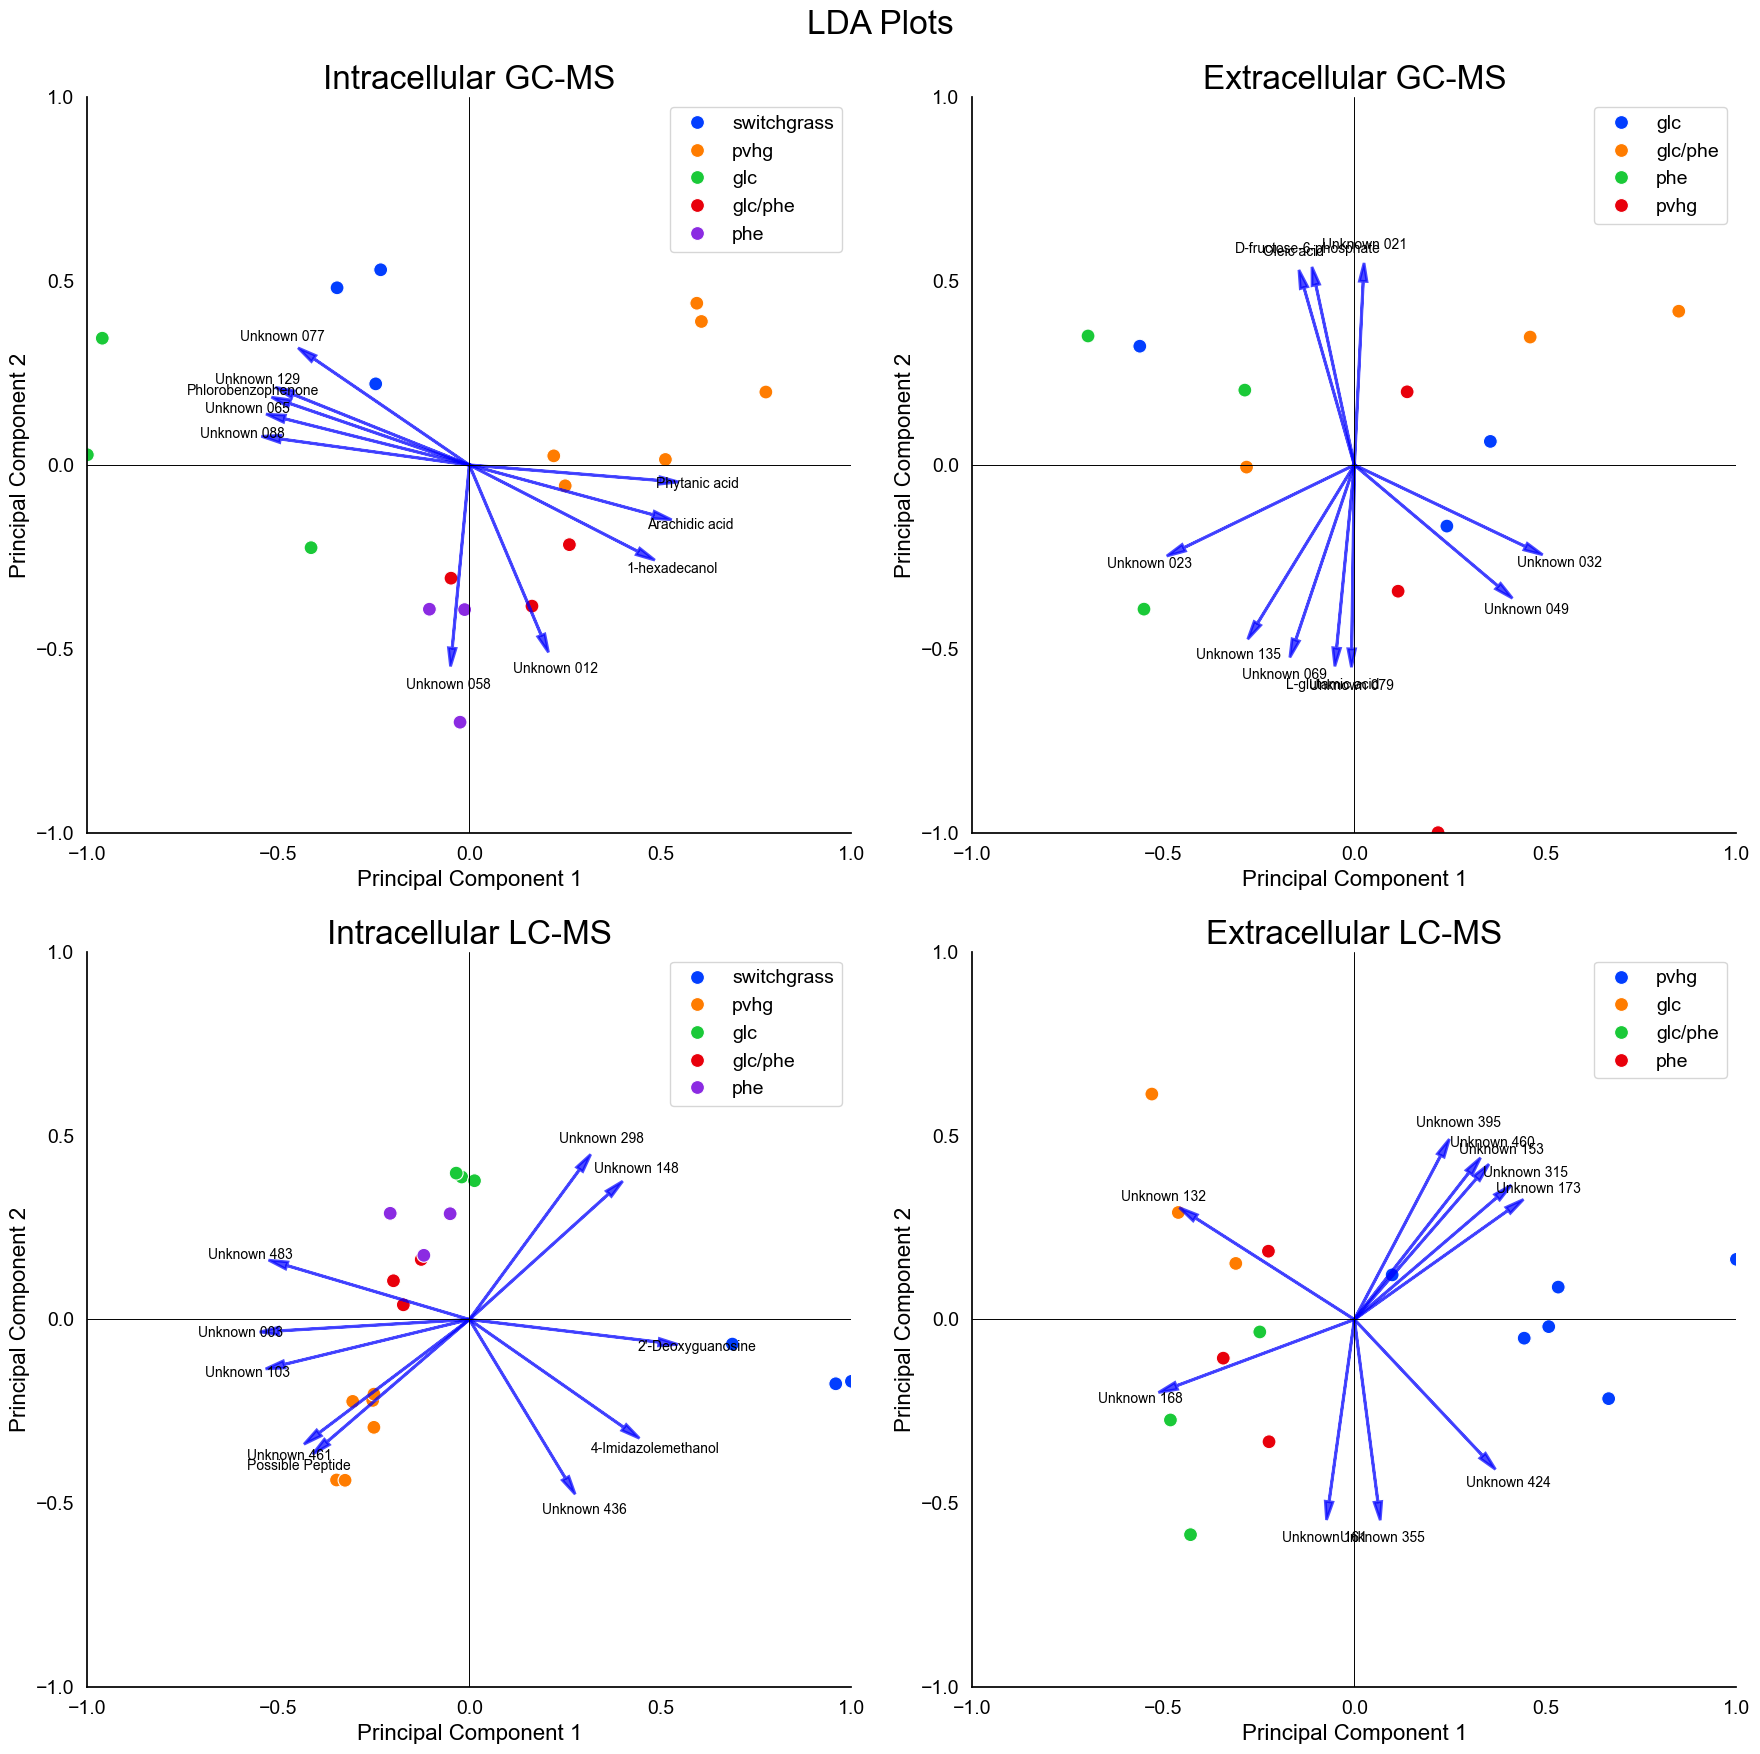

,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,LD5 Coef,abs_LD1_LD2_distance
1-hexadecanol,0.000018,-0.000010,-1.214818e-05,9.514398e-07,1.864771e-06,0.000020
Arachidic acid,0.000016,-0.000004,-7.519790e-06,-7.286387e-06,1.069261e-05,0.000016
Phytanic acid,0.000013,-0.000001,-1.126185e-05,2.818996e-07,-8.741228e-07,0.000013
Unknown 088,-0.000012,0.000002,-1.944455e-06,9.307355e-06,-6.326241e-06,0.000012
Unknown 058,-0.000001,-0.000012,-3.397190e-07,9.476895e-07,1.154152e-05,0.000012
Unknown 065,-0.000010,0.000003,-1.504146e-06,4.451810e-06,6.910010e-08,0.000010
Unknown 129,-0.000009,0.000004,3.262321e-06,5.256761e-06,-8.517851e-06,0.000010
Unknown 012,0.000003,-0.000008,3.594374e-06,-2.294594e-06,5.966995e-06,0.000009
Unknown 077,-0.000007,0.000005,-5.051305e-06,3.111253e-06,8.291235e-07,0.000008
Phlorobenzophenone,-0.000006,0.000002,-1.523539e-06,3.242758e-06,-8.868212e-07,0.000007


,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,abs_LD1_LD2_distance
L-glutamic acid,-6.143212e-07,-0.000007,-0.000001,8.329837e-06,0.000007
Unknown 135,-2.880572e-06,-0.000005,0.000005,2.410273e-06,0.000006
Unknown 079,-7.291248e-08,-0.000005,0.000004,7.973028e-07,0.000005
D-fructose-6-phosphate,-9.970328e-07,0.000005,-0.000006,1.756902e-06,0.000005
Unknown 032,3.443598e-06,-0.000002,-0.000002,4.431959e-07,0.000004
Oleic acid,-9.240071e-07,0.000003,-0.000003,8.304685e-07,0.000004
Unknown 023,-2.444514e-06,-0.000001,0.000001,2.409949e-06,0.000003
Unknown 049,1.932530e-06,-0.000002,-0.000002,1.391121e-06,0.000003
Unknown 069,-6.738661e-07,-0.000002,0.000003,1.278825e-07,0.000002
Unknown 021,9.510013e-08,0.000002,-0.000003,8.196194e-07,0.000002


,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,LD5 Coef,abs_LD1_LD2_distance
Unknown 298,7.392509e-07,1.045669e-06,1.100221e-06,5.836329e-07,-4.052407e-06,1.280592e-06
Possible Peptide,-6.303709e-07,-5.630694e-07,-1.815216e-06,1.556383e-06,-1.041103e-07,8.452305e-07
Unknown 436,4.200133e-07,-7.210540e-07,-3.758676e-07,-8.084599e-07,2.293828e-06,8.344639e-07
Unknown 148,6.065914e-07,5.685789e-07,3.696033e-07,-9.268342e-07,3.088948e-07,8.314055e-07
2'-Deoxyguanosine,8.205463e-07,-1.019499e-07,-8.694033e-08,-3.733061e-07,1.149562e-07,8.268555e-07
4-Imidazolemethanol,6.281025e-07,-4.560080e-07,-1.992211e-07,-5.318506e-07,1.090828e-06,7.761804e-07
Unknown 003,-7.359898e-07,-4.573474e-08,-1.796222e-07,6.152408e-07,-2.691348e-07,7.374094e-07
Unknown 103,-7.134604e-07,-1.797426e-07,-7.007251e-07,8.852328e-07,-1.765375e-07,7.357535e-07
Unknown 483,-6.964526e-07,2.140211e-07,1.517387e-08,1.129720e-06,-1.792183e-06,7.285954e-07
Unknown 461,-5.441193e-07,-4.264369e-07,-3.264869e-07,4.372278e-07,4.225876e-07,6.913134e-07


,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,LD5 Coef,abs_LD1_LD2_distance
Unknown 298,7.392509e-07,1.045669e-06,1.100221e-06,5.836329e-07,-4.052407e-06,1.280592e-06
Possible Peptide,-6.303709e-07,-5.630694e-07,-1.815216e-06,1.556383e-06,-1.041103e-07,8.452305e-07
Unknown 436,4.200133e-07,-7.210540e-07,-3.758676e-07,-8.084599e-07,2.293828e-06,8.344639e-07
Unknown 148,6.065914e-07,5.685789e-07,3.696033e-07,-9.268342e-07,3.088948e-07,8.314055e-07
2'-Deoxyguanosine,8.205463e-07,-1.019499e-07,-8.694033e-08,-3.733061e-07,1.149562e-07,8.268555e-07
4-Imidazolemethanol,6.281025e-07,-4.560080e-07,-1.992211e-07,-5.318506e-07,1.090828e-06,7.761804e-07
Unknown 003,-7.359898e-07,-4.573474e-08,-1.796222e-07,6.152408e-07,-2.691348e-07,7.374094e-07
Unknown 103,-7.134604e-07,-1.797426e-07,-7.007251e-07,8.852328e-07,-1.765375e-07,7.357535e-07
Unknown 483,-6.964526e-07,2.140211e-07,1.517387e-08,1.129720e-06,-1.792183e-06,7.285954e-07
Unknown 461,-5.441193e-07,-4.264369e-07,-3.264869e-07,4.372278e-07,4.225876e-07,6.913134e-07


In [7]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18))

# Plot each PCA plot in a separate subplot
plot_pca_lda(axs[0, 0], intracellular_gc_ms_lda, intracellular_gc_ms_lda_ls, 'Intracellular GC-MS')
plot_pca_lda(axs[0, 1], extracellular_gc_ms_lda, extracellular_gc_ms_lda_ls, 'Extracellular GC-MS')
plot_pca_lda(axs[1, 0], intracellular_lc_ms_pos_lda, intracellular_lc_ms_pos_lda_ls, 'Intracellular LC-MS')
plot_pca_lda(axs[1, 1], extracellular_lc_ms_pos_lda, extracellular_lc_ms_pos_lda_ls, 'Extracellular LC-MS')

# Add an overall title for the entire figure
fig.suptitle('LDA Plots', fontsize=24)

# Automatically adjust the layout to minimize white space
plt.tight_layout()

# save to file
plt.savefig('../figures/lda_plot_with_unknowns.png', dpi=300)

# Display the plots
plt.show()
display(intracellular_gc_ms_lda_ls.head(10))
display(extracellular_gc_ms_lda_ls.head(10))
display(intracellular_lc_ms_pos_lda_ls.head(10))
display(intracellular_lc_ms_pos_lda_ls.head(10))

## Generate PCA and LDA without unknown metabolites

### Make dataframes without the unknown metabolites

In [8]:
intracellular_df = filter_and_clean_dataframe(intracellular_df, labels_to_keep, filter_unknowns=True)
extracellular_1_df = filter_and_clean_dataframe(extracellular_1_df, extra_labels_to_keep, filter_unknowns=True)
extracellular_4_df = filter_and_clean_dataframe(extracellular_4_df, extra_labels_to_keep, filter_unknowns=True)
intracellular_pos_df = filter_and_clean_dataframe(intracellular_pos_df, labels_to_keep, filter_unknowns=True)
intracellular_neg_df = filter_and_clean_dataframe(intracellular_neg_df, labels_to_keep, filter_unknowns=True)
extracellular_pos_df = filter_and_clean_dataframe(extracellular_pos_df, extra_labels_to_keep, filter_unknowns=True)
extracellular_neg_df = filter_and_clean_dataframe(extracellular_neg_df, extra_labels_to_keep, filter_unknowns=True)

print(f'intracellular_df has shape {intracellular_df.shape}')
print(f'extracellular_1_df has shape {extracellular_1_df.shape}')
print(f'extracellular_4_df has shape {extracellular_4_df.shape}')
print(f'intracellular_pos_df has shape {intracellular_pos_df.shape}')
print(f'intracellular_neg_df has shape {intracellular_neg_df.shape}')
print(f'extracellular_pos_df has shape {extracellular_pos_df.shape}')
print(f'extracellular_neg_df has shape {extracellular_neg_df.shape}')

intracellular_df.head()

intracellular_df has shape (18, 84)
extracellular_1_df has shape (3, 45)
extracellular_4_df has shape (12, 40)
intracellular_pos_df has shape (18, 209)
intracellular_neg_df has shape (18, 184)
extracellular_pos_df has shape (15, 59)
extracellular_neg_df has shape (15, 76)


,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,Dehydroalanine,...,L-methionine sulfoxide,Maltotriitol,Maltotriose,Melibiose,O-phospho-L-serine,Phlorobenzophenone,Phytanic acid,Porphine,Shikimate-3-phosphate,Turanose
in_switchgrass_wt_early_stat_1,361520.397329639,158448.34341112,322605.073303065,677195.048082466,710902.55546792,21587.08362939,1742924.76926073,2187317.70629786,73643.828000748,317216.41938428,...,57650.95129084,0.0,197109.09808694,154515.482330361,912327.96567334,54886.784330598,53255.6038503064,1567848.0586232,79592.744504499,41592.877786195
in_switchgrass_wt_early_stat_2,227309.55760657,213583.36610502,312837.42938902,575822.106374466,510742.474927335,30589.6316662972,1362157.06455961,2078919.83564604,85094.117589131,336929.76297088,...,33682.73078276,0.0,132211.94520795,178537.388821497,546466.68582922,13966.873772048999,54527.47671824,942871.57758861,101591.311751851,125701.00546245
in_switchgrass_wt_early_stat_3,398074.885557321,211939.49668843,296180.63097077,819996.231224398,618736.890582027,43765.31575552,1604466.57278453,2008970.44657791,110175.160063256,515591.82996428,...,68076.39291200001,19900.1574488,130384.73448493,92173.058229043,656821.37515376,26902.583198962,56933.25212629,1269753.69603953,74901.178091305,93064.52323487
in_pvhg_wt_early_stat_1a,15162280.8838296,415540.715236955,271752.376247778,72902.08496758,594252.444514168,30943.57955535,2485640.0470855,1821222.8634703,228090.297121264,220103.450019034,...,65791.95675730999,0.0,46002.15191532,45797.01792878,244917.939423229,30514.717408853998,41711.03618778,1191269.79205348,74966.129693052,115508.27512833
in_pvhg_wt_early_stat_2a,18852341.7192045,414698.828302764,282297.43522253,2048534.51426727,631378.749461895,34596.4930274828,3083610.04949007,2065605.09371182,267275.475767908,440350.185467694,...,192791.27122674,87602.9049696,0.0,152281.830320128,42215.306175899,38377.218959317994,46684.49842109,1857530.45155866,105883.846141951,0.0


### Generate LDA and PCA data without unknown metabolites

In [9]:
intracellular_gc_ms_pca, intracellular_gc_ms_pca_ls = get_pca_coordinates(intracellular_df)
extracellular_gc_ms_pca, extracellular_gc_ms_pca_ls = get_pca_coordinates(extracellular_4_df)
intracellular_lc_ms_pos_pca, intracellular_lc_ms_pos_pca_ls = get_pca_coordinates(intracellular_pos_df)
extracellular_lc_ms_pos_pca, extracellular_lc_ms_pos_pca_ls = get_pca_coordinates(extracellular_pos_df)

intracellular_gc_ms_lda, intracellular_gc_ms_lda_ls = get_lda_coordinates(intracellular_df)
extracellular_gc_ms_lda, extracellular_gc_ms_lda_ls = get_lda_coordinates(extracellular_4_df)
intracellular_lc_ms_pos_lda, intracellular_lc_ms_pos_lda_ls = get_lda_coordinates(intracellular_pos_df)
extracellular_lc_ms_pos_lda, extracellular_lc_ms_pos_lda_ls = get_lda_coordinates(extracellular_pos_df)

display(intracellular_gc_ms_pca)
intracellular_gc_ms_pca_ls

,Principal Component 1,Principal Component 2,Group
in_switchgrass_wt_early_stat_1,9.766054e+07,-8.043531e+06,switchgrass
in_switchgrass_wt_early_stat_2,-5.393577e+07,-4.865286e+07,switchgrass
in_switchgrass_wt_early_stat_3,7.961688e+07,-1.775542e+07,switchgrass
in_pvhg_wt_early_stat_1a,9.208638e+07,-3.980199e+07,pvhg
in_pvhg_wt_early_stat_2a,1.072489e+08,-8.753986e+06,pvhg
in_pvhg_wt_early_stat_3a,1.042982e+08,-2.131181e+07,pvhg
in_glc_wt_early_stat_1,-1.291215e+08,4.096210e+06,glc
in_glc_wt_early_stat_2,-1.355190e+08,1.011754e+07,glc
in_glc_wt_early_stat_3,-1.216311e+08,-2.186667e+07,glc
in_glc/phe_wt_early_stat_1,-8.345576e+07,-6.173582e+06,glc/phe


,Principal Component 1,Principal Component 2,abs_distance
Trehalose,0.957159,0.163560,0.971033
Phosphate Ion,-0.196540,0.942664,0.962935
L-aspartic acid,0.078915,0.199192,0.214255
L-pyroglutamic acid,-0.142846,-0.043874,0.149432
L-glutamine,-0.037988,0.131220,0.136608
...,...,...,...
Shikimate-3-phosphate,0.000013,-0.000290,0.000290
Citric acid,-0.000129,-0.000165,0.000209
Arachidic acid,-0.000095,-0.000185,0.000208
Phytanic acid,-0.000027,0.000178,0.000180


### Make PCA plots without unknown metabolites

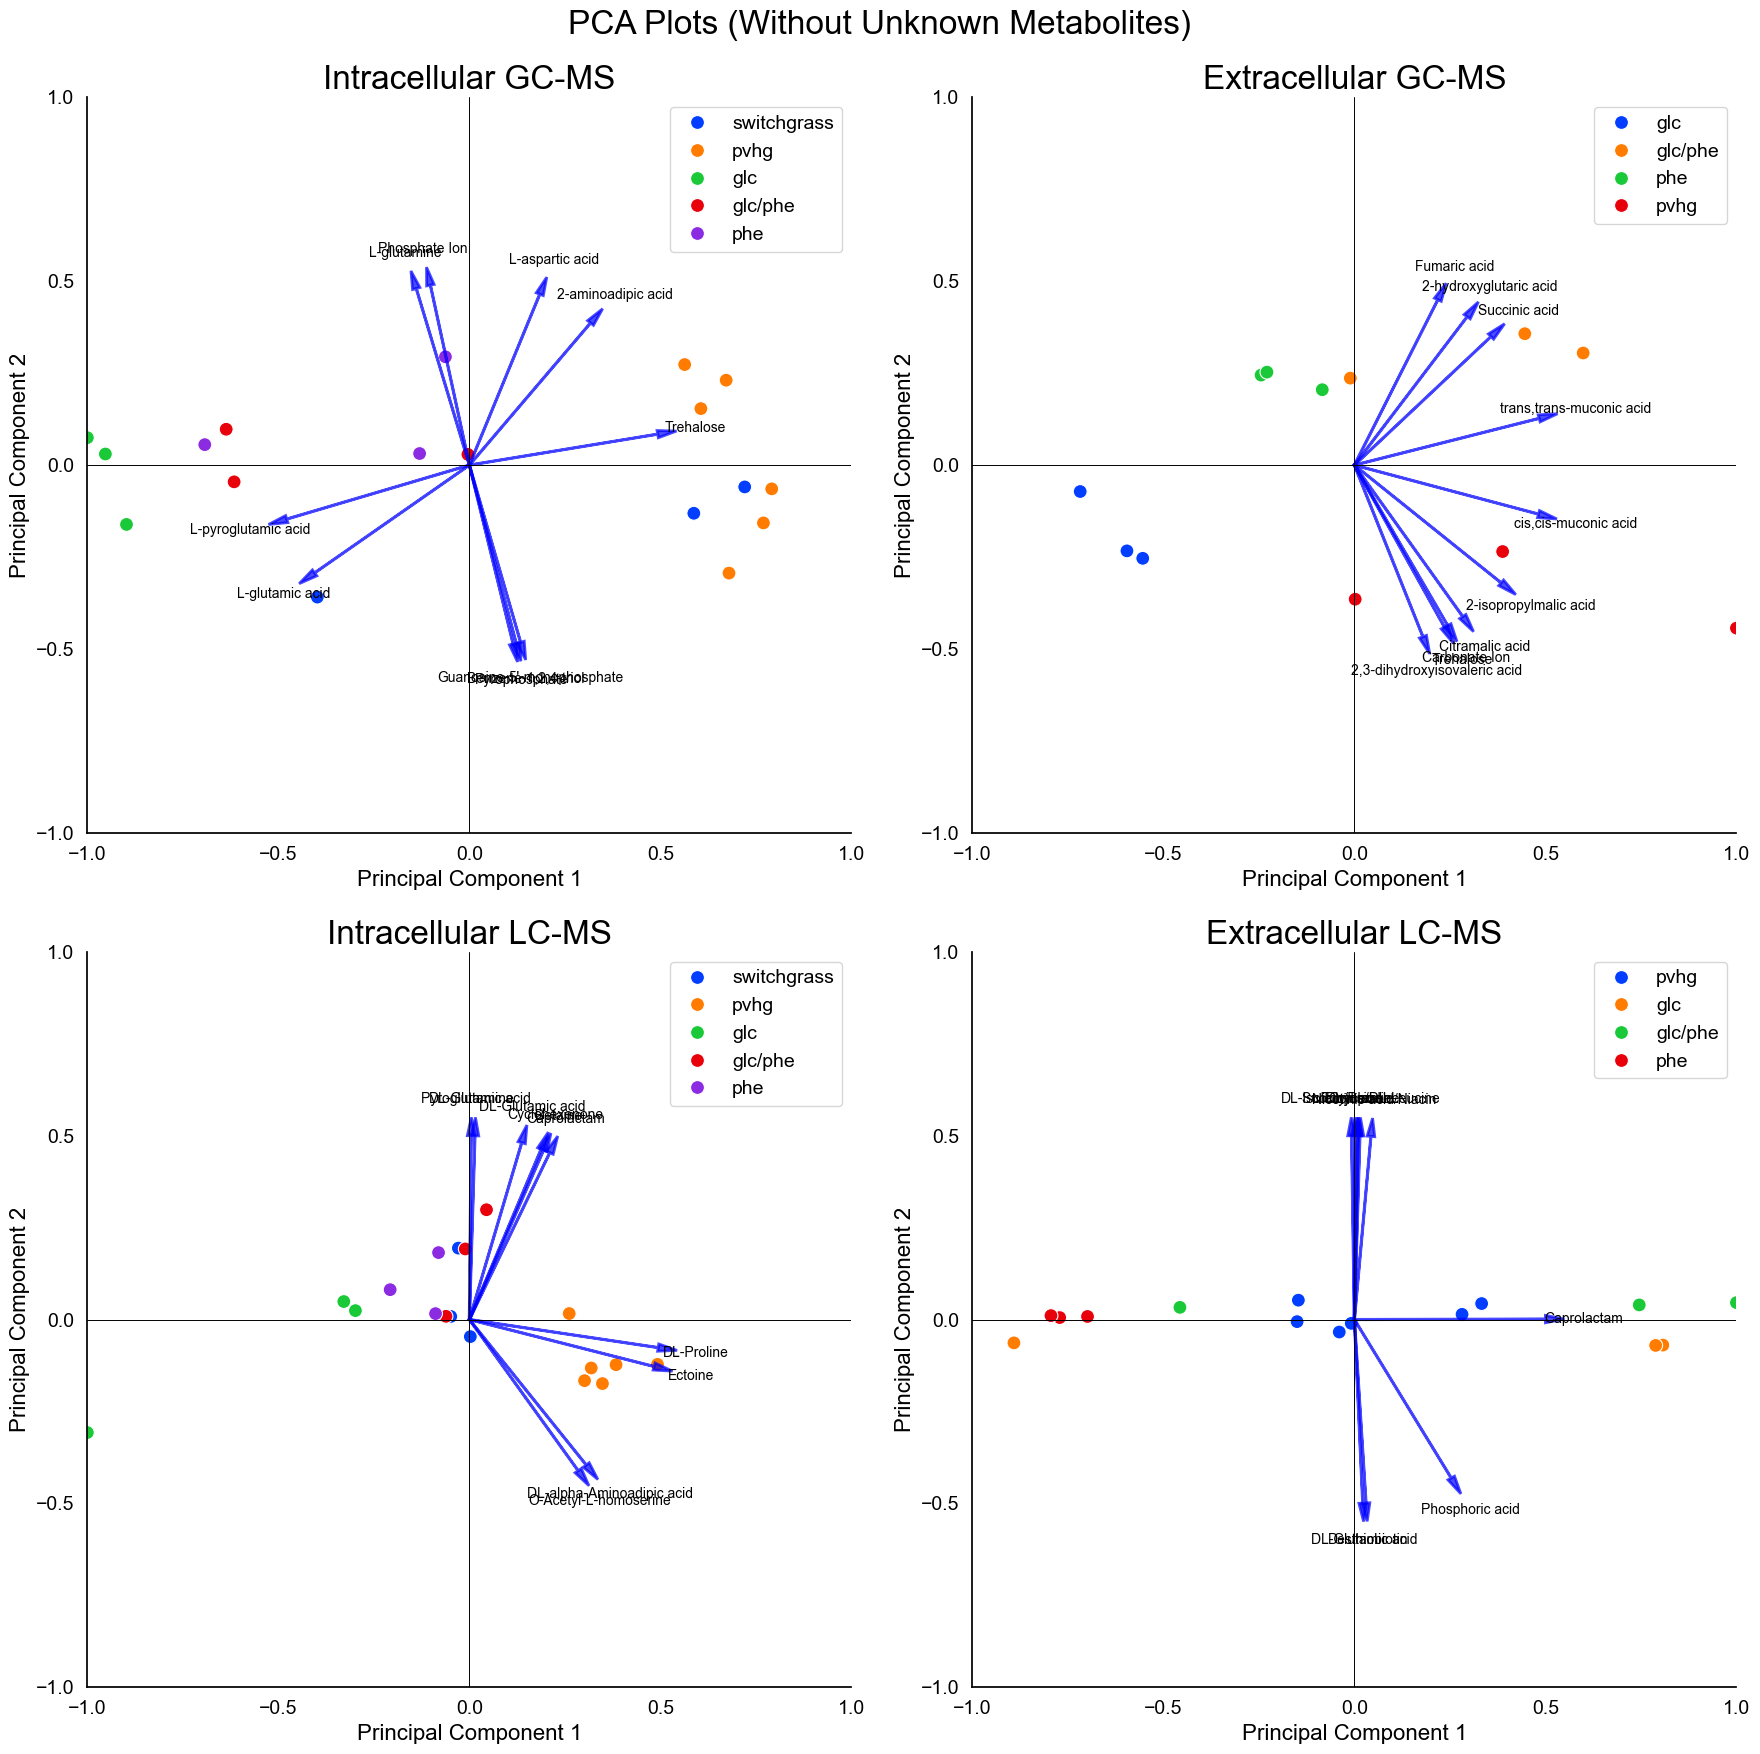

In [10]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18))


# Plot each PCA plot in a separate subplot
plot_pca_lda(axs[0, 0], intracellular_gc_ms_pca, intracellular_gc_ms_pca_ls, 'Intracellular GC-MS')
plot_pca_lda(axs[0, 1], extracellular_gc_ms_pca, extracellular_gc_ms_pca_ls, 'Extracellular GC-MS')
plot_pca_lda(axs[1, 0], intracellular_lc_ms_pos_pca, intracellular_lc_ms_pos_pca_ls, 'Intracellular LC-MS')
plot_pca_lda(axs[1, 1], extracellular_lc_ms_pos_pca, extracellular_lc_ms_pos_pca_ls, 'Extracellular LC-MS')

# Add an overall title for the entire figure
fig.suptitle('PCA Plots (Without Unknown Metabolites)', fontsize=24)

# Automatically adjust the layout to minimize white space
plt.tight_layout()

# save to file
plt.savefig('../figures/pca_plot_without_unknowns.png', dpi=300)

# Display the plots
plt.show()

### Make LDA plots without unknown metabolites 

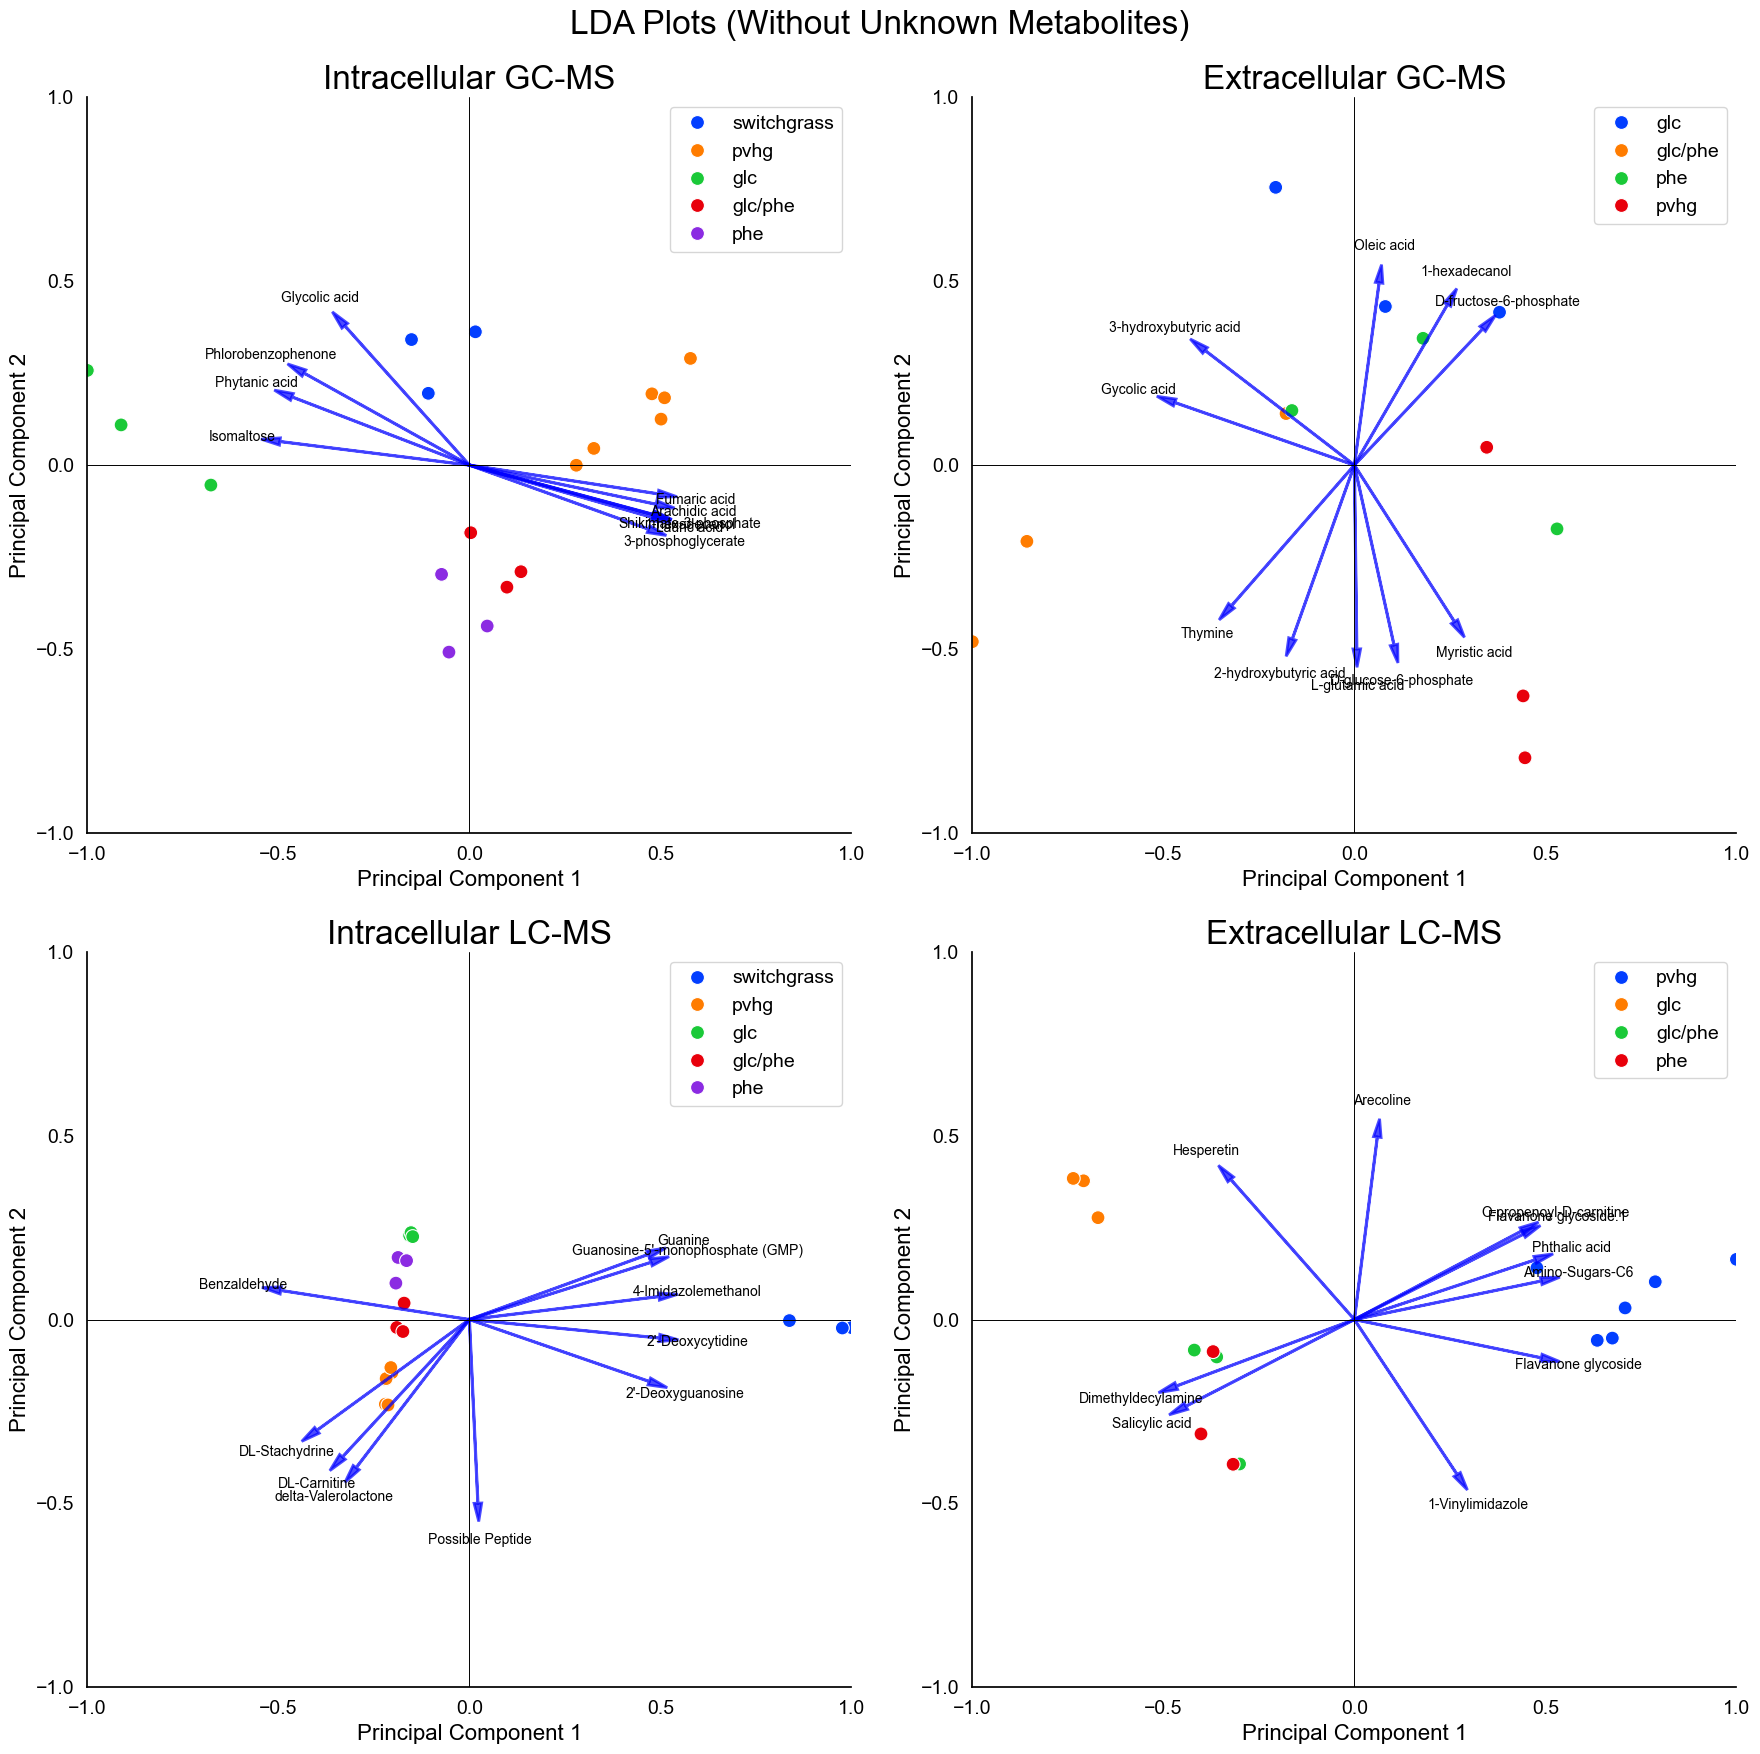

,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,LD5 Coef,abs_LD1_LD2_distance
Phytanic acid,-0.000077,0.000031,-0.000021,4.921960e-05,-3.089701e-05,0.000083
Isomaltose,-0.000073,0.000009,-0.000018,2.754176e-05,2.582746e-05,0.000073
1-hexadecanol,0.000069,-0.000019,-0.000034,1.787896e-05,-5.197099e-05,0.000072
Arachidic acid,0.000069,-0.000015,-0.000019,-3.815107e-05,4.147596e-05,0.000071
Phlorobenzophenone,-0.000026,0.000015,-0.000007,1.467138e-05,-1.110586e-05,0.000030
Lauric acid,0.000026,-0.000008,0.000012,-9.112827e-06,-1.188983e-05,0.000027
Shikimate-3-phosphate,0.000026,-0.000007,-0.000010,-2.214820e-06,-4.161429e-06,0.000026
Fumaric acid,0.000026,-0.000004,-0.000001,-1.773483e-05,1.488577e-05,0.000026
Glycolic acid,-0.000014,0.000017,0.000014,1.467038e-06,-1.933285e-05,0.000022
3-phosphoglycerate,0.000017,-0.000006,-0.000009,-4.826697e-07,-8.968061e-07,0.000018


,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,abs_LD1_LD2_distance
L-glutamic acid,8.333070e-07,-0.000066,4.758542e-06,0.000060,0.000066
D-fructose-6-phosphate,4.356300e-05,0.000048,-2.336042e-05,-0.000068,0.000065
Oleic acid,3.876839e-06,0.000030,-1.610458e-05,-0.000017,0.000030
Thymine,-7.907176e-06,-0.000009,5.303142e-06,0.000012,0.000012
D-glucose-6-phosphate,2.406509e-06,-0.000011,1.280789e-06,0.000008,0.000012
3-hydroxybutyric acid,-7.400633e-06,0.000006,-4.011372e-07,0.000002,0.000009
2-hydroxybutyric acid,-2.326646e-06,-0.000007,1.577828e-07,0.000009,0.000007
Gycolic acid,-6.665974e-06,0.000002,3.156040e-07,0.000004,0.000007
1-hexadecanol,3.138117e-06,0.000006,-1.633324e-06,-0.000007,0.000006
Myristic acid,3.123147e-06,-0.000005,-7.168436e-07,0.000003,0.000006


,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,LD5 Coef,abs_LD1_LD2_distance
2'-Deoxyguanosine,4.653928e-06,-1.665135e-06,-9.331622e-07,-4.551168e-06,0.000007,0.000005
delta-Valerolactone,-2.802724e-06,-3.811046e-06,-3.470998e-06,-4.416498e-06,0.000019,0.000005
DL-Stachydrine,-2.348505e-06,-1.773473e-06,-2.046369e-06,-1.772212e-06,0.000010,0.000003
Guanine,2.719048e-06,1.029409e-06,1.512370e-06,-9.358553e-08,-0.000005,0.000003
2'-Deoxycytidine,2.605674e-06,-2.630349e-07,-1.007498e-07,-3.333633e-06,0.000004,0.000003
Benzaldehyde,-2.533265e-06,4.060380e-07,-1.578001e-06,2.670501e-07,0.000003,0.000003
Possible Peptide,9.665514e-08,-2.169664e-06,-8.821748e-06,-1.055496e-06,0.000013,0.000002
Guanosine-5'-monophosphate (GMP),1.934969e-06,6.333076e-07,2.138711e-06,2.027367e-07,-0.000005,0.000002
DL-Carnitine,-1.286263e-06,-1.447322e-06,-1.402111e-06,-1.565612e-06,0.000007,0.000002
4-Imidazolemethanol,1.862758e-06,2.344955e-07,-1.897903e-06,-1.613841e-06,0.000003,0.000002


,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,LD5 Coef,abs_LD1_LD2_distance
2'-Deoxyguanosine,4.653928e-06,-1.665135e-06,-9.331622e-07,-4.551168e-06,0.000007,0.000005
delta-Valerolactone,-2.802724e-06,-3.811046e-06,-3.470998e-06,-4.416498e-06,0.000019,0.000005
DL-Stachydrine,-2.348505e-06,-1.773473e-06,-2.046369e-06,-1.772212e-06,0.000010,0.000003
Guanine,2.719048e-06,1.029409e-06,1.512370e-06,-9.358553e-08,-0.000005,0.000003
2'-Deoxycytidine,2.605674e-06,-2.630349e-07,-1.007498e-07,-3.333633e-06,0.000004,0.000003
Benzaldehyde,-2.533265e-06,4.060380e-07,-1.578001e-06,2.670501e-07,0.000003,0.000003
Possible Peptide,9.665514e-08,-2.169664e-06,-8.821748e-06,-1.055496e-06,0.000013,0.000002
Guanosine-5'-monophosphate (GMP),1.934969e-06,6.333076e-07,2.138711e-06,2.027367e-07,-0.000005,0.000002
DL-Carnitine,-1.286263e-06,-1.447322e-06,-1.402111e-06,-1.565612e-06,0.000007,0.000002
4-Imidazolemethanol,1.862758e-06,2.344955e-07,-1.897903e-06,-1.613841e-06,0.000003,0.000002


In [11]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18))

# Plot each PCA plot in a separate subplot
plot_pca_lda(axs[0, 0], intracellular_gc_ms_lda, intracellular_gc_ms_lda_ls, 'Intracellular GC-MS')
plot_pca_lda(axs[0, 1], extracellular_gc_ms_lda, extracellular_gc_ms_lda_ls, 'Extracellular GC-MS')
plot_pca_lda(axs[1, 0], intracellular_lc_ms_pos_lda, intracellular_lc_ms_pos_lda_ls, 'Intracellular LC-MS')
plot_pca_lda(axs[1, 1], extracellular_lc_ms_pos_lda, extracellular_lc_ms_pos_lda_ls, 'Extracellular LC-MS')

# Add an overall title for the entire figure
fig.suptitle('LDA Plots (Without Unknown Metabolites)', fontsize=24)

# Automatically adjust the layout to minimize white space
plt.tight_layout()

# save to file
plt.savefig('../figures/lda_plot_without_unknowns.png', dpi=300)

# Display the plots
plt.show()

display(intracellular_gc_ms_lda_ls.head(10))
display(extracellular_gc_ms_lda_ls.head(10))
display(intracellular_lc_ms_pos_lda_ls.head(10))
display(intracellular_lc_ms_pos_lda_ls.head(10))